# Obtaining, parsing and structuring static HTML websites

In this notebook we will learn how to scrape basic static, i.e. non-interactive HTML-based websites. We will
- obtain the HTML raw content using the `requests` module
- convert the raw HTML into a format that is easier to search, or parse, using the `BeautifulSoup` module
- learn how to identify the elements of interest in the raw HTML using the browser's inspect functionality and the CSS SelectorGadget
- construct a table, or dataframe, with the popular table calculation module `pandas` and store the output locally in a standard spreadsheet format

1. Open the Anaconda Prompt and install the module `requests`

In [1]:
import requests

In [2]:
seed = 'https://www.uni-potsdam.de/de/'

2. What data type is the object `seed`? How can you check?

In [3]:
type(seed)

str

3. Is this domain an admissible path? Hint: Check the `robots.txt`

In [4]:
html = requests.get(seed)

4. Was the request successful? How can you check the status? Hint: Check the available methods by using Jupyter's auto-complete functionality, i.e. type a dot at the end of the object you're investigating followed by <kbd>Tab</kbd>

In [5]:
html.status_code

200

5. Which method could be most informative w.r.t. actual content? How many characters long is the raw HTML file?

In [7]:
len(html.text)

65760

6. Display the first 518 characters of the `html` object.

In [9]:
html.text[:518]

'<!DOCTYPE html><html dir="ltr" lang="de-DE"><head><meta charset="utf-8"><!-- benaja - web solutions (www.benaja-websolutions.com) Markus Meier, Roland Brandt und Tobias Gaertner GbR This website is powered by TYPO3 - inspiring people to share! TYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL. TYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners. Information and contribution at https://typo3.org/'

7. Display meta information on the origin of the HTTP request, e.g. date. Note that it is possible to specify the `user-agent` that the server receives and provides the response (website representation) such that it optimised, e.g. Desktop vs. mobile. If it's not specified, the request will be sent using default values (potentially) containing information about your operating system, screen resolution, keyboard language, IP address and many more.

In [10]:
html.headers

{'Date': 'Wed, 14 Apr 2021 07:42:38 GMT', 'Server': 'Apache/2.4.29 (Ubuntu)', 'Vary': 'Accept-Encoding', 'Last-Modified': 'Wed, 14 Apr 2021 06:00:06 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '11792', 'Cache-Control': 'max-age=0', 'Expires': 'Wed, 14 Apr 2021 07:42:38 GMT', 'X-UA-Compatible': 'IE=edge', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=utf-8'}

The cell below saves the HTML object's text attribute in HTML format locally.

In [ ]:
with open('Uni_Potsdam.html', 'w', encoding='utf-8') as f:
    
    f.write(html.text)

8. Install the module `BeautifulSoup` via `pip install beautifulsoup4`

In [7]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(html.text, "html.parser")

NameError: name 'BeautifulSoup' is not defined

9. Parse the BeautifulSoup object `soup` for all Affiliate Links. Hint: In a HTML document all elements that lead to another domain are indicated by an `a` and follow the structure `<a href="...", ... >text</a>`. Hint: Use `soup`'s method `find_all()` where the input argument is the elements' prefix. What object type is the output? Can you iterate over it? How many elements of an Affiliate Link type are contained in the HTML file?

10. Convert the BeautifulSoup object into a "plain" Python list object containing the elements' **text** attributes by iterating over it. Hint: Instantiate an empty `list` object, write a for-loop and `append` each element to the list object. You may also remove any unwanted whitespaces by using the `strip` function.

In [ ]:
empty_list = []

for link in soup.find_all('a'):
    
    empty_list.append(link.text.strip())

#### Pro-Tipp
Instead of explicitly writing a for-loop when disentangling specific objects from an aggregate object you can use Python's built-in `map` and `lambda` functions as a one-liner.

In [ ]:
results_list = list(map(lambda x: x.text.strip(), soup.find_all('a')))

11. Identify the element which text attribute's value is equal to "alle Artikel". Return the element's position (`index`) within the list.

In [ ]:
results_list.index('alle Artikel')

12. Obtain this element's value of the `href` attribute. It should be an URL pointing at the domain where the news at Universität Potsdam are collected.

In [ ]:
new_seed = soup.find_all('a')[224].get('href')

In [ ]:
new_seed

13. Write a function which takes a String-type object (e.g. an URL) as input and returns a readily parse-able `BeautifulSoup` object.

In [ ]:
def URL_to_BS(url):
    
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")
    
    return soup

In [ ]:
news_soup = URL_to_BS(new_seed)

14. Open the `new_seed` URL in your browser and enable the CSS SelectorGadget. Highlight the box containing the first article. The other, similar boxes should be highlighted as well. Copy the identified CSS selector and parse through the `news_soup` object but this time over elements corresponding to the CSS selector you found (use `.select()` instead of `find_all()`). Store the subset of elements in a list. You can achieve all of this in one line of code. How many items does this list contain?

In [ ]:
news_list = list(map(lambda x: x, news_soup.select('.up-news-list-item')))

In [ ]:
len(news_list)

15. Split the list's elements into their hyperlinks (`href`) and text attributes' values.

In [ ]:
link_list = []
title_list = []

for link_num in range(len(news_list)):
    
    sub_link = news_list[link_num].findChild("a")['href']
    sub_title = news_list[link_num].findChild("a")['title']
    
    if type(sub_link) is str and 'www' not in sub_link:
        
        link_list.append('https://www.uni-potsdam.de' + sub_link)
        title_list.append(sub_title)

In [ ]:
lot = list(zip(title_list, link_list))

In [ ]:
D = dict(lot)

In [ ]:
import json

In [ ]:
with open('Uni_Potsdam_dict.json', 'w', encoding='utf-8') as f:
    
    json.dump(D, f, ensure_ascii=False)

In [ ]:
with open('Uni_Potsdam_dict.json', 'r', encoding='utf-8') as f:
    
    D_read = json.load(f)

In [ ]:
D == D_read

## Pagination
You have probably realised that the articles presented on the first news page are not the entire collection of the University of Potsdam. Your goal is to retrieve a complete collection of all articles that are available on the university's website and you can easily apply your new knowledge in a repetive manner.

16. Figure out how many pages containing articles content there are in total. You can do it manually by e.g. inspecting the URL when you proceed through the collection in your browser or by checking it programmatically by writing a `while` loop that continues until some condition, such as a status returned from your request, is violated. Make sure to include a short pause (1 second) in order not to overcharge the server that in some cases could lead to a temporary ban of your device.

In [ ]:
import time

articles_links = []

counter = 0

test_seed = 'https://www.uni-potsdam.de/de/nachrichten/'
test_html = requests.get(seed)
status = test_html.status_code

while status == 200:
    
    print('Scraping page ' + str(counter) + '.')
    
    if counter < 1:
        
        seed = 'https://www.uni-potsdam.de/de/nachrichten/'
        
        html = requests.get(seed)
        
        status = html.status_code
        
        soup = BeautifulSoup(html.text, "html.parser")
        
        news_list = list(map(lambda x: x, soup.select('.up-news-list-item')))
        
        link_list = []
        title_list = []

        for link_num in range(len(news_list)):
    
            sub_link = news_list[link_num].findChild("a")['href']
            sub_title = news_list[link_num].findChild("a")['title']
    
            if type(sub_link) is str and 'www' not in sub_link:
        
                link_list.append('https://www.uni-potsdam.de' + sub_link)
                title_list.append(sub_title)
        
        articles_links.extend(link_list)
        
    elif counter >= 1:
        
        seed = 'https://www.uni-potsdam.de/de/nachrichten/page-{}'.format(str(counter+1))
        
        html = requests.get(seed)
        
        status = html.status_code
        
        soup = BeautifulSoup(html.text, "html.parser")
        
        news_list = list(map(lambda x: x, soup.select('.up-news-list-item')))
        
        link_list = []
        title_list = []

        for link_num in range(len(news_list)):
    
            sub_link = news_list[link_num].findChild("a")['href']
            sub_title = news_list[link_num].findChild("a")['title']
    
            if type(sub_link) is str and 'www' not in sub_link:
        
                link_list.append('https://www.uni-potsdam.de' + sub_link)
                title_list.append(sub_title)
        
        articles_links.extend(link_list)
        
    counter += 1
    
    time.sleep(1)

In [ ]:
with open('articles_links.txt', 'w') as output:
    
    output.writelines("%s\n" % line for line in articles_links)

17. Read in the JSON file you stored in step 17 and iterate over each hyperlink. Split the list into 4 evenly sized chunks and iterate over each chunk. In each iteration, obtain the HTML, parse it and identify the elements of the publication date, the contact, the contact's email address, the image's hyperlink/reference and the main text body's length. Note that some, or even all, of these elements may not be available. Define an appropriate data type for each field and append it **as a dictionary** in each iteration to a list.

In [8]:
articles_links_r = []

with open('articles_links.txt', 'r') as filehandle:
    lines = filehandle.readlines()

    for line in lines:
        # remove linebreak which is the last character of the string
        current_line = line[:-1]

        articles_links_r.append(current_line)

In [ ]:
articles_links_r == articles_links

In [9]:
chunk_list = []

chunk_size = 250
iteration = 0

max_it = int(len(articles_links_r) / chunk_size)

for chunk_id in range(max_it):
    
    begin_index = iteration * chunk_size
    end_index = iteration * chunk_size + chunk_size
    
    chunk = articles_links_r[begin_index:end_index]
    
    chunk_list.append(chunk)
    
    iteration += 1

In [10]:
from tqdm.notebook import tqdm
import time

start = time.time()

results_list = []

for link in tqdm(chunk_list[0]):
    
    empty_dict = {}
    
    html = requests.get(link)
    soup = BeautifulSoup(html.text, "html.parser")
    
    try:
        publication_date = soup.findAll(class_ =['time', 'up-news-single-date'])[0].text.strip()
    except:
        publication_date = 'No publication date found.'
    
    try:
        author_name = soup.findAll(class_ =['up-news-single-author'])[0].text[5:].strip()
    except:
        author_name = 'No author found.'
    
    try:
        image_list = list(map(lambda x: x, soup.select('img')))
        image_url = ['https://www.uni-potsdam.de' + x['src'] for x in image_list if x['src'][-4:] == ".jpg"][0]
    except:
        image_url = "No image found."
        
    try:
        abstract = soup.select('.up-opener-text-with-border')[0].text.strip()
        abstract_length = str(len(abstract))
    except:
        abstract = 'No abstract found.'
        abstract_length = 0
        
    empty_dict['URL'] = link
    empty_dict['Publication date'] = publication_date
    empty_dict['Author Name'] = author_name
    empty_dict['Image URL'] = image_url
    empty_dict['Abstract'] = abstract
    empty_dict['Abstract Length'] = int(abstract_length)
    
    results_list.append(empty_dict)
        
end = time.time()

print(end - start)

  0%|          | 0/250 [00:00<?, ?it/s]

33.65146088600159


## Asynchronous HTTP requests

18. Install the libaries `asyncio`, `aiohttp` and `tqdm`.

In [11]:
import asyncio
import aiohttp
import bs4
import tqdm

In [12]:
import nest_asyncio
nest_asyncio.apply()

async def get(*args, **kwargs):
    
    async with aiohttp.ClientSession() as session:
        
        async with session.get(*args, **kwargs) as resp:
            return (await resp.text())
        
def get_fields(page):
    
    soup = bs4.BeautifulSoup(page, "html.parser")
    
    try:
        publication_date = soup.findAll(class_ =['time', 'up-news-single-date'])[0].text.strip()
    except:
        publication_date = 'No publication date found.'
        
    try:
        author_name = soup.findAll(class_ =['up-news-single-author'])[0].text[5:].strip()
    except:
        author_name = 'No author found.'
    
    try:
        image_list = list(map(lambda x: x, soup.select('img')))
        image_url = ['https://www.uni-potsdam.de' + x['src'] for x in image_list if x['src'][-4:] == ".jpg"][0]
    except:
        image_url = "No image found."
        
    try:
        abstract = soup.select('.up-opener-text-with-border')[0].text.strip()
        abstract_length = str(len(abstract))
    except:
        abstract = 'No abstract found.'
        abstract_length = 0
    
    return publication_date, author_name, image_url, abstract, abstract_length


async def save_fields(query):
    
    url = query
    
    async with sem:
        
        page = await get(url, compress=True)
        
        empty_dict = {}
    
        [publication_date, author_name, image_url, abstract, abstract_length] = get_fields(page)
    
        empty_dict['URL'] = url
        empty_dict['Publication date'] = publication_date
        empty_dict['Author Name'] = author_name
        empty_dict['Image URL'] = image_url
        empty_dict['Abstract'] = abstract
        empty_dict['Abstract Length'] = int(abstract_length)
    
        results_list.append(empty_dict)

sem = asyncio.Semaphore(5)

In [13]:
start = time.time()

results_list = []

loop = asyncio.get_event_loop()

tasks = []

for link in chunk_list[0]:
        
    task = asyncio.ensure_future(save_fields(link))
    tasks.append(task)

responses = [await f for f in tqdm.tqdm(asyncio.as_completed(tasks), total=len(tasks))]

result = loop.run_until_complete(asyncio.wait(tasks))

end = time.time()

print(end - start)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:17<00:00, 14.55it/s]

17.186518907546997


In [14]:
start = time.time()

results_list = []

loop = asyncio.get_event_loop()
f = asyncio.wait([save_fields(d) for d in articles_links_r])
result = loop.run_until_complete(f)

end = time.time()

print(end - start)

59.02334189414978


In [15]:
len(results_list)

999

In [16]:
len(articles_links_r)

1000

19. Find the missing link that appears in `articles_links_r` but not in `results_list` using a list comprehension.

In [17]:
found_list = []

for element in results_list:
    
    found_list.append(element['URL'])

In [18]:
[i for i in articles_links_r if i not in found_list]

['https://www.uni-potsdam.de/de/nachrichten/detail/2020-03-13-informationen-fuer-angehoerige-der-universitaet-potsdam-im-zusammenhang-mit-dem-coronavirus']

20. Install the `pandas` library.

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(results_list)
df.head()

,URL,Publication date,Author Name,Image URL,Abstract,Abstract Length
0,https://www.uni-potsdam.de/de/nachrichten/deta...,04.02.2021,Deutsches GeoForschungsZentrum (GFZ),https://www.uni-potsdam.de/fileadmin/_processe...,Neuere Messungen von Raumsonden der NASA haben...,867
1,https://www.uni-potsdam.de/de/nachrichten/deta...,27.11.2019,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,Die Qualität von Studium und Lehre zu sichern ...,581
2,https://www.uni-potsdam.de/de/nachrichten/deta...,27.11.2019,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,No abstract found.,0
3,https://www.uni-potsdam.de/de/nachrichten/deta...,09.07.2019,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,Klausuren am Computer – kann das funktionieren...,368
4,https://www.uni-potsdam.de/de/nachrichten/deta...,08.02.2021,Magda Pchalek,https://www.uni-potsdam.de/fileadmin/_processe...,Prof. Dr. Urs Granacher ist Sportwissenschaftl...,861


In [21]:
df.describe()

,Abstract Length
count,999.000000
mean,452.716717
std,327.348773
min,0.000000
25%,209.000000
50%,476.000000
75%,656.500000
max,2264.000000


21. Convert the `publication_date` into a `pandas` `datetime` object and plot a time series of published articles on a daily basis. Bonus: Aggregate the time series into monthly frequency. In which month-year were most articles published?

In [22]:
df.set_index(pd.to_datetime(df['Publication date'], format='%d.%m.%Y'), inplace = True)

In [23]:
df = df.sort_index(ascending=True)
df.head()

,URL,Publication date,Author Name,Image URL,Abstract,Abstract Length
Publication date,,,,,,
2016-12-01,https://www.uni-potsdam.de/de/nachrichten/deta...,01.12.2016,No author found.,No image found.,No abstract found.,0
2016-12-01,https://www.uni-potsdam.de/de/nachrichten/deta...,01.12.2016,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,Der Wortschatz ist klein und nimmt nur langsam...,663
2016-12-05,https://www.uni-potsdam.de/de/nachrichten/deta...,05.12.2016,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,Zehn Fragen für ein Buch – gestellt an Dr. Mal...,187
2016-12-05,https://www.uni-potsdam.de/de/nachrichten/deta...,05.12.2016,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,Dem Forschungsprojekt “Sprachvariation in Nord...,681
2016-12-05,https://www.uni-potsdam.de/de/nachrichten/deta...,05.12.2016,No author found.,https://www.uni-potsdam.de/fileadmin/_processe...,"Ob Naturschutz, Sport, soziales Engagement: De...",496


In [24]:
df.to_csv("Articles_archive.csv", encoding='utf-8-sig')

In [25]:
df = pd.read_csv("Articles_archive.csv")
df.set_index(pd.to_datetime(df['Publication date.1'], format='%d.%m.%Y'), inplace = True)

In [26]:
del df['Publication date']

In [27]:
df.iloc[0]['URL']

'https://www.uni-potsdam.de/de/nachrichten/detail/2016-12-01-didaktikwerkstatt-englisch-oeffnet'

In [28]:
df['Abstract Length'].mean()

452.7167167167167

In [29]:
daily_count = pd.DataFrame(df.groupby(pd.Grouper(freq='D')).count()['URL'])

22. Install the library `matplotlib`.

In [30]:
import matplotlib
import matplotlib.pyplot as plt

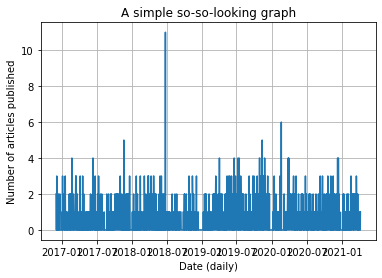

In [31]:
fig, ax = plt.subplots()
ax.plot(daily_count.index, daily_count.URL)

ax.set(xlabel='Date (daily)', ylabel='Number of articles published',
       title='A simple so-so-looking graph')
ax.grid()

#fig.savefig("daily_publications.png")
plt.show()

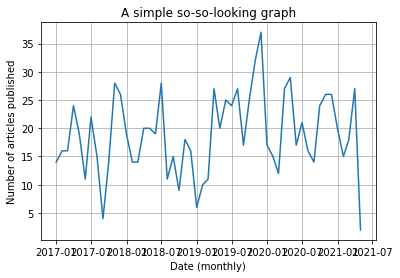

In [32]:
monthly_count = pd.DataFrame(df.groupby(pd.Grouper(freq='M')).count()['URL'])

fig, ax = plt.subplots()
ax.plot(monthly_count.index, monthly_count.URL)

ax.set(xlabel='Date (monthly)', ylabel='Number of articles published',
       title='A simple so-so-looking graph')
ax.grid()

#fig.savefig("monthly_publications.png")
plt.show()

In [33]:
monthly_count['URL'].mean()

18.849056603773583

23. Install the libraries `cufflinks` and `plotly`.

In [34]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [35]:
fig = go.Figure(data=[
    
    go.Scatter(name='Published articles', x = list(monthly_count.index),
    y = list(monthly_count['URL']))
    
])

fig.layout.update(title = go.layout.Title(
                        text='Published articles (monthly)'))

fig.layout.update(yaxis= go.layout.YAxis(title=go.layout.yaxis.Title(
                        text='Count')))

fig.layout.update(xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'Date'), rangeslider = dict(visible = True)));

iplot(fig, filename = 'published_articles')

24. Install the `chart-studio` library.

In [36]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go

25. Log in to [Plotly Chart Studio](https://chart-studio.plotly.com/Auth/login/#/) and obtain your `Username` and `API key`. Store them both line-by-line in a .py file, e.g. name it "plotly_config.py".

In [37]:
import plotly_config

chart_studio.tools.set_credentials_file(username=plotly_config.Username, api_key=plotly_config.api_key)

In [38]:
fig = go.Figure(data=[
    
    go.Scatter(name='Published articles', x = list(monthly_count.index),
    y = list(monthly_count['URL']))
    
])

fig.layout.update(title = go.layout.Title(
                        text='Published articles (monthly)'))

fig.layout.update(yaxis= go.layout.YAxis(title=go.layout.yaxis.Title(
                        text='Count')))

fig.layout.update(xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'Date'), rangeslider = dict(visible = True)));

py.plot(fig, filename = 'published_articles', auto_open = True)

'https://plotly.com/~gerwolf/194/'